<a href="https://colab.research.google.com/github/FultonBsc/SIM_YAC_ORDONEZ_UPSE2023/blob/main/Ejercicio25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy  as np
import math

In [17]:
#Datos del yacimiento
L=30000
dx=15000
Tiempo=100
DT=1
K=50 #Permeabilidad MD
por=0.5
vis=1 # centipoise
B=0.7 #Factor volumetrico rb/stb
CompTotal=1.2*10**(-6) #ps1-1
A=200000#ft^2

In [18]:
Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta

0.3703703703703704

In [19]:
Alpha

83333333.33333334

In [20]:
#Crear matriz que guarda los valores del esquema Explicito
Pimplicita=np.zeros((Tiempo//DT,(L//dx)+2))#Al colocar 2 veces el // se obtiene una division exacta
Qimplicita=np.zeros((Tiempo//DT,(L//dx)))

In [21]:
#Condiciones iniciales
P0=2000 #Presion en el nodo cero
PB1=7000 #Presion en el borde 1
P1=2*PB1-P0
Piz=0 #Presion izquierda
Pder=0 #Presion derecha
N=((L//dx)+2)
Pin=np.zeros(N) #Vector inicial creado  de 1 para poder ingresar la presion de yacimiento
Pres=np.zeros(N) #Vector inicial vacio para colocar los resultados
for i in range(0,len(Pin)-1): # se encarga de llenar los datos del espacio
  Pin[i]=P1
  Pin[0]=Piz
  Pin[1]=P0
  Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]
Pin=Pin
Pin

array([     0.,   2000.,  12000., -12000.])

In [22]:
Baccumul=(A*dx*por*CompTotal)/B # volumen acumulado formula
Transmisibilidad=(K*A/(vis*B*dx))*6.33*10**-3# formulta de la transmisibilidadad con factor de correccion por las diferentes unidades
Bc=np.zeros([N-2,N-2])#vector en cero de el volumen acumulado donde se ingresan los valores de acuerdo a las condiciones
Tr=np.zeros([N-2,N-2])#vector en cero de el volumen acumulado donde se ingresan los valores de transmisiblidad de acuerdo a las condiciones
Bc

array([[0., 0.],
       [0., 0.]])

In [23]:
#Caracteristicas de la matriz de Volumen acumulado
for i in range(0,N-2):
  Bc[i,i]= Baccumul#Solo cuando i=i va a tener el mismo valor que el volumenacumulado
 #Caracteristicas de la matriz de la transmisibilidad
for i in range(0,N-2):
  Tr[i,i]=2*Transmisibilidad#Solo cuando i=i va a tener el valor del doble de transmisibilidad
  if i>0: #siempre y cuando i se encuentre en la posicion mayor a 0
    Tr[i,i-1]=-Transmisibilidad#Los valores de la derecha cuando i=i van a ser la transmisibilidad negativa
  if i<(N-3): #siempre y cuando i se encuentre en la posicion mayor a N-3
    Tr[i,i+1]=-Transmisibilidad  #Los valores de la izquierda cuando i=i van a ser la transmisibilidad negativa
Tr[0,0]=3*Transmisibilidad # Cuando se encuentren en la posicion 0,0 va a vales tres veces la transmisibilidad
Tr[N-3,N-3]=Transmisibilidad# Cuando se encuentren en la posicion N-3,N-3 va a ser igual a la transmisibilidad
Tr

array([[18.08571429, -6.02857143],
       [-6.02857143,  6.02857143]])

In [24]:
#Respecto a la presion
Matriz_resolucion=np.zeros_like(Tr) # se crea matriz del tamaño del T
Vector_sol=np.zeros_like(Pin[1:-1])# Se indica donde empieza y hasta donde termina la matriz en ceros
Matriz_resolucion=Tr+(Bc/DT) #Aplicacion de una parte de la ecuacion del esquema implicito
Vector_sol=np.matmul(Bc/DT,Pin[1:-1])#Calcula las matrices, multiplica la matriz  B/DT con Pin[1:-1]
#Pres=[]
#Respecto al caudal
Q=np.zeros_like(Vector_sol)# se crea matriz del tamaño del Vector_sol
Q[0]=2*Transmisibilidad*Piz# se coloca la condicion cuando Q se encuentre en el nodo cero
Vector_sol=Vector_sol+Q

In [25]:
Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)#como es un sistema de ecuaciones lineales se resuelve por linalg

In [26]:
Pcal

array([ 2013.91404521, 11976.6429356 ])

In [27]:
Qimplicita[0]=Q
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Vector_sol=np.matmul(Bc/DT,Pcal)+Q
  Qimplicita[t//DT]=Vector_sol
  t=t+DT

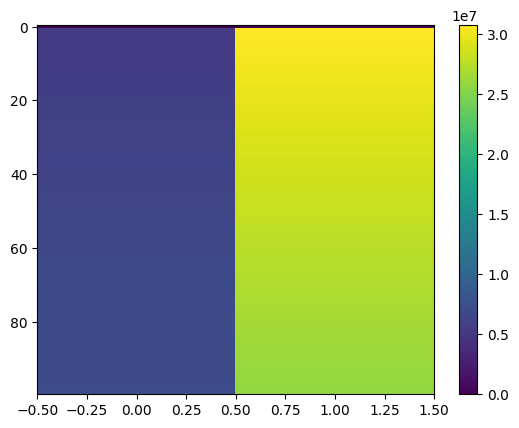

In [28]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Qimplicita,aspect='auto')
plt.colorbar()


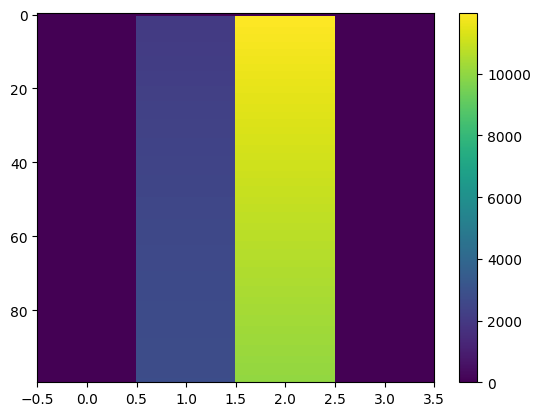

In [29]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()
